# Plot submissions per month versus time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
%matplotlib inline

In [2]:
date = '2024-06-12'

In [3]:
df = pd.read_csv('submissions_with_date_{}.csv'.format(date), index_col='last_updated',
                 usecols=['collaboration', 'last_updated'], parse_dates=True)

Drop all rows with collaboration of `IPPP Durham`.

In [4]:
df[df.collaboration == 'IPPP Durham'].size

65

In [5]:
df = df[df.collaboration != 'IPPP Durham']

Drop all rows with zero microseconds, because these are mostly records migrated from the old site.

In [6]:
df = df[df.index.microsecond != 0]

First group by year.

In [7]:
df_year = df.groupby(by=df.index.year).count()
df_year

,collaboration
last_updated,
2016,1
2017,125
2018,171
2019,201
2020,274
2021,348
2022,264
2023,336
2024,139


Then also by month.

In [8]:
df.index = df.index.strftime('%Y-%m')

In [9]:
df.head()

,collaboration
last_updated,
2022-01,A2 at MAMI
2022-01,A2 at MAMI
2022-01,A2 at MAMI
2022-01,A2 at MAMI
2022-02,A2 at MAMI


In [10]:
df_count = df.groupby(by=df.index).count()

Rename column names.

In [11]:
df_count = df_count.rename(columns={'collaboration': 'Number of papers'})

In [12]:
df_count.index.names = ['Month']

In [13]:
df_count.head()

,Number of papers
Month,
2016-12,1
2017-01,7
2017-02,7
2017-03,13
2017-04,18


In [14]:
df_count.tail()

,Number of papers
Month,
2024-02,28
2024-03,31
2024-04,21
2024-05,30
2024-06,7


Drop the first and last month since likely to be incomplete.

In [15]:
df_count = df_count[1:-1]

In [16]:
df_count.head()

,Number of papers
Month,
2017-01,7
2017-02,7
2017-03,13
2017-04,18
2017-05,7


In [17]:
df_count.tail()

,Number of papers
Month,
2024-01,22
2024-02,28
2024-03,31
2024-04,21
2024-05,30


Make a bar plot of 'Number of papers' against 'Month' with a linear fit overlaid.

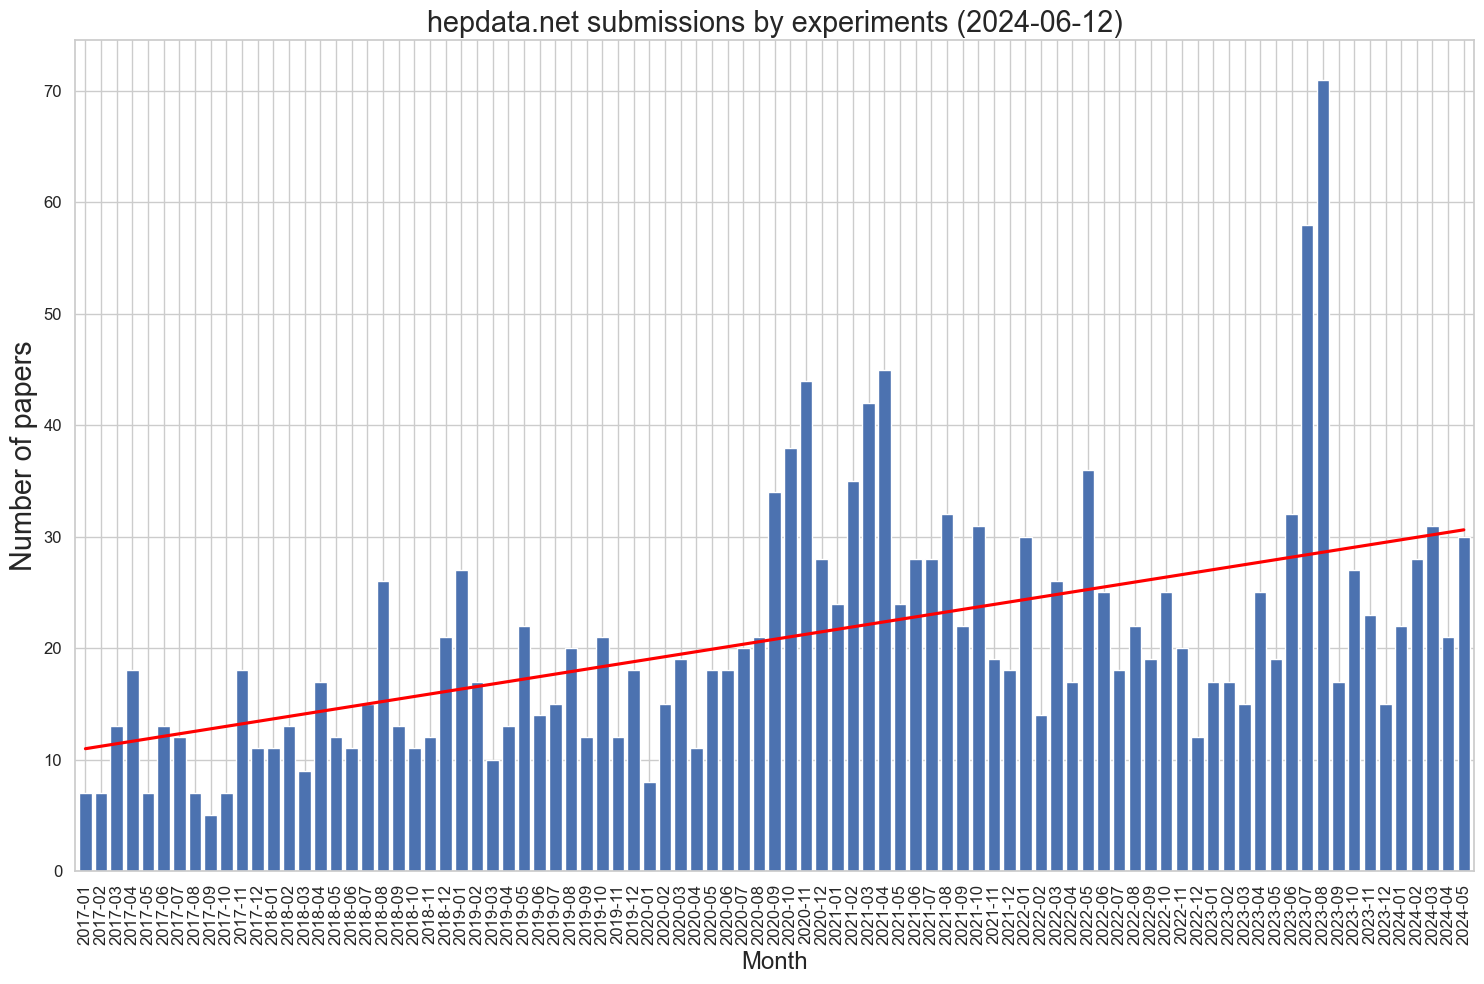

In [18]:
plt.figure(facecolor='white', figsize=(15,10))
ax = plt.subplot()

# Bar plot of 'Number of papers' against 'Month'.
df_count.plot(kind='bar', width=0.8, legend=False, fontsize='medium', ax=ax)

# Add a red line with a linear regression fit.
sns.regplot(x=np.arange(df_count.shape[0]), y='Number of papers', data=df_count,
            scatter=False, ci=None, color='red')

plt.title('hepdata.net submissions by experiments ({})'.format(date), fontsize='xx-large')
plt.xlabel('Month', fontsize='x-large')
plt.ylabel('Number of papers', fontsize='xx-large')
plt.tight_layout()
plt.savefig('submissions_with_date_{}.png'.format(date))
plt.show()

Also make a bar plot of 'Number of papers' against 'Year'.

In [19]:
df_year = df_year.rename(columns={'collaboration': 'Number of papers'})
df_year.index.names = ['Year']
df_year = df_year[1:-1]  # drop the first and last year
df_year

,Number of papers
Year,
2017,125
2018,171
2019,201
2020,274
2021,348
2022,264
2023,336


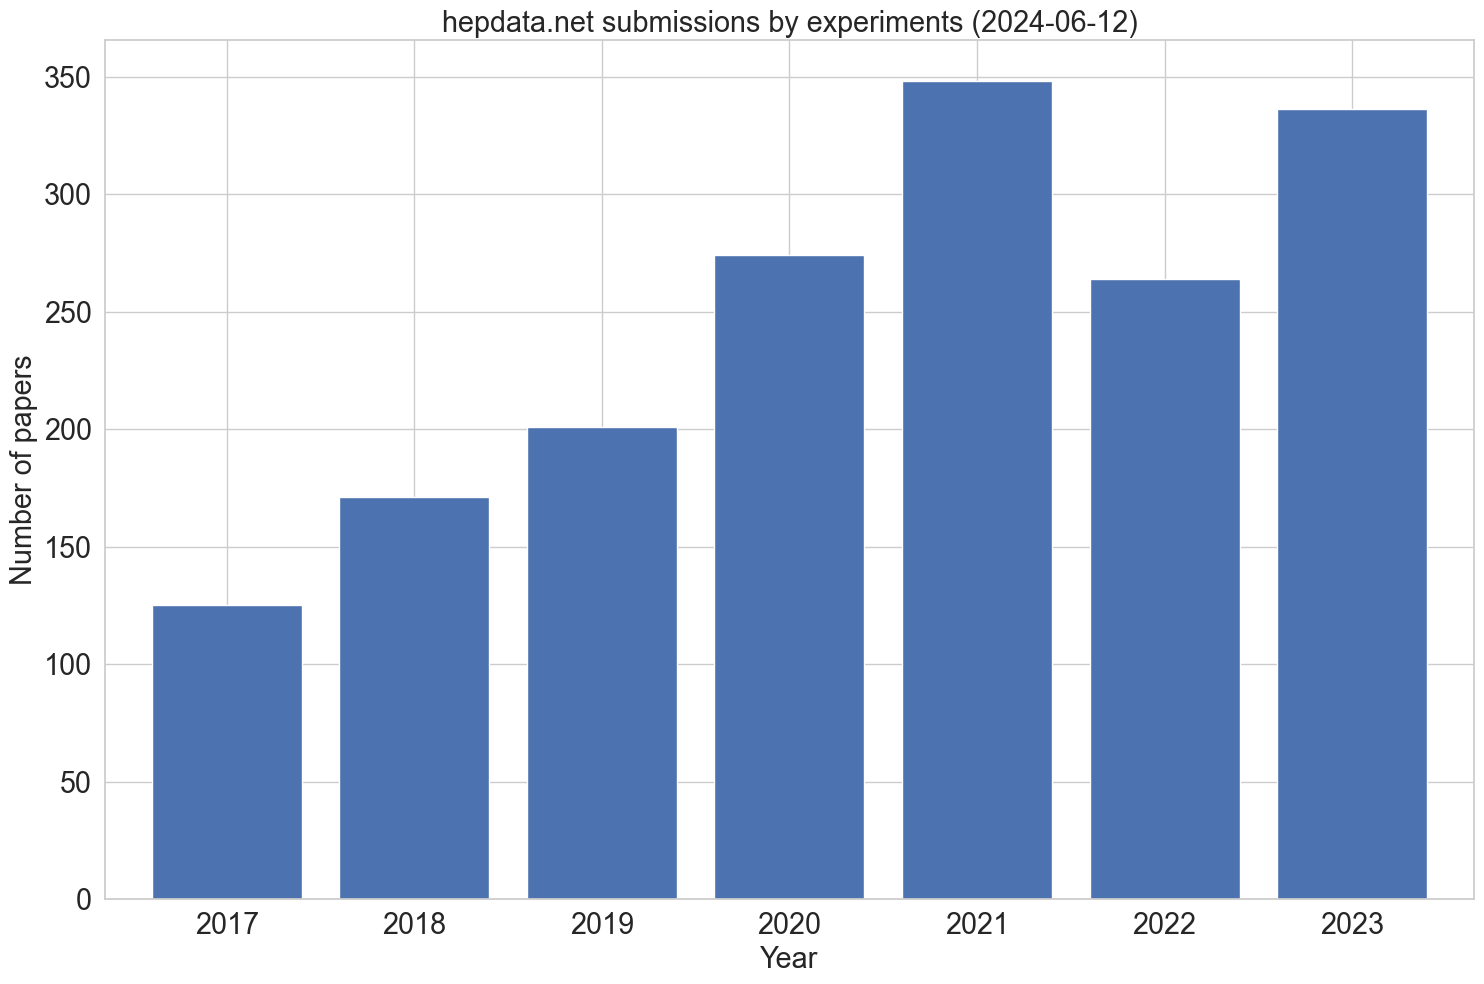

In [20]:
plt.figure(facecolor='white', figsize=(15,10))
ax = plt.subplot()

# Bar plot of 'Number of papers' against 'Year'.
df_year.plot(kind='bar', rot=0, width=0.8, legend=False, fontsize='xx-large', ax=ax)

plt.title('hepdata.net submissions by experiments ({})'.format(date), fontsize='xx-large')
plt.xlabel('Year', fontsize='xx-large')
plt.ylabel('Number of papers', fontsize='xx-large')
plt.tight_layout()
plt.savefig('submissions_per_year_{}.png'.format(date))
plt.show()